<h1> Lab 3: A Regression Study of COVID-19</h1>

<h2> Madhu Hegde, Jae Young Park, SangDuck Choi </h2>




# Introduction

In this lab, we formulated linear regression method to study the spread of COVID-19 by selecting a research question, then conducting a regression study to analyize it. 

Recent spike in COVID-19 cases in the US after relaxing lock-down measures is a major concern. We are planning to use COVID-19 observational data and answer the research question - if ignoring the Mask Mandate and casual attitude of younger population resulted in rise of COVID-19 cases in some states.


The following variables are operationalized 

|  Group | Variables | 
| --- | --- | 
| State Characteristics |  Children 0-18/Adults 19-25/Adults 26-34 |
| --- | --- | 
| State Characteristics |  Population Density |
| --- | --- | 
| State Characteristics |  Percentage of people below poverty line |
| --- | --- | 
| State response | Mandate face mask use by employees in public-facing businesses |
| --- | --- | 
| State response | Maximum Unemployment Benefit |
| --- | --- | 
| Variable representing Spread of COVID-19 | CasesInLast7Days  |


The database contains information on COVID-19 cases in last 7 days that is significantly higher than 7 day average since the start of the outbreak. Even though CDC was very clear in its guidelines about face mask usage and social distancing, there was a state wide discrepancy in how mask usage was mandated and younger population defied the social distancing rules.  There is a clear impact of such reckless behavior in the rise of COVID-19 cases and we are going to assess the same in our linear regression method.

# Data


The data provided  Majid Maki-Nayeri is used for this study.

The dataset includes (1) variables representing the spread of the disease, (2) variables representing state-level policy responses, and (3) general state-level characteristics.

Following libraries are used

In [1]:

#include libraries
library(tidyverse)
library(effsize)
library(ggplot2)
library(e1071)
library(knitr)
library(gridExtra)
library(coin)
library(readxl)
library(openxlsx)
library(lmtest)
library(car)
library(sandwich)
library(stargazer)

# Read data file
df1 <- read.xlsx(xlsxFile = "covid-19_dist0720\ .xlsx", sheet = 2, skipEmptyRows = FALSE)
head(df1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: survival

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted

,State,Total.Cases,Total.Death,Death_100k,CasesInLast7Days,RatePer100000,totalTestResults,State.of.emergency,Stay.at.home/.shelter.in.place,End/relax.stay.at.home/shelter.in.place,⋯,Percent.living.under.the.federal.poverty.line.(2018),Percent.at.risk.for.serious.illness.due.to.COVID,All-cause.deaths.2018,Children.0-18,Adults.19-25,Adults.26-34,Adults.35-54,Adults.55-64,65+,Since.Mandate.Face.mask
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,44909,1009,20.6,9804,918.8,449886,43903,43925,43951,⋯,16.8,43.1,54352,0.24,0.09,0.12,0.25,0.14,0.17,52
2,Alaska,1138,16,2.2,284,154.3,122732,43901,43918,43945,⋯,10.9,32.8,4453,0.27,0.09,0.13,0.26,0.13,0.12,69
3,Arizona,83376,1538,25.2,28038,1367.7,604362,43901,43921,43967,⋯,14.0,39.1,59282,0.24,0.09,0.12,0.24,0.12,0.18,55
4,arizona,14713,271,25.2,28038,1367.7,604362,43901,43921,43967,⋯,14.0,39.1,59282,0.24,0.09,0.12,0.24,0.12,0.18,52
5,Arkansas,23814,287,9.5,4504,790.2,338893,43901,44015,44015,⋯,17.2,43.5,32336,0.25,0.09,0.12,0.25,0.13,0.17,52
6,California,260155,6331,16.0,53722,657.7,4680138,43894,43909,43959,⋯,12.8,33.3,268818,0.24,0.09,0.14,0.26,0.12,0.14,58



# A Model Building Process


1. What do we measure? 

We want to measure the recent spike in infection of COVID-19 and it is available as CasesInLast7Days. Since different states have different sizes and populations, we normalize this variable with the state population(Population 2018) to get last.sevendays.cases.per100k.  

2. What covariates help you correctly and accurately measure a causal effect? 

The age group information of the population is available as Children 0-18/Adults 19-25/Adults 26-34. We sum up the numbers to get percentage of people between 0 and 34 years. We used difference between last day of the data collection and start date of mandating face masks as number of days of active enforcement of CDC mask policy. 

The transimission rate (R0) of COVID-19 depends on contact rate and population density. Hence we are going to select population density per square mile as another covariate variable. 

So far we have not found any covariates that are problematic due to multicollinearity

3. What transformations should you apply to each variable?  

The last.sevendays.cases.per100k is a large positive integer. The COVID-19 transmission rate depends on the contact ratio. So Intutively, it makes sense to use log() transformation for the variable last.sevendays.cases.per100k. The COVID-19 transmission is exponential - so, log() transformation measures the change in the rate in a way.

4. Anomalies (missing values, top-coded variables, etc.)

We fixed following anomalies in the dataset.  
 - Missing values for start & end dates of Shelter In Place, start/end dates of closing non-essential business and start date of mask mandate. We searched the internet for government/executive orders of various states and filled in accurate information in the excel sheet.
 
 - Top coded the start dates for state actions/policies without start date to the last date of data measurement/collection.
 
 - Bottom coded the end dates for state actions/policies without end date to the last date of data measurement/collection.
 
 - We found duplicate values for states (Arizona) and consolidated the rows.

In [2]:
# check duplicate State names
df1[1] = lapply(df1[1], tolower)
duplicated(df1[1]) | duplicated(df1[1], fromLast=TRUE)

# index 3 and 4 have duplicate state name, now figure which to remove
df1[3,2]/df1[3,16]*100000
df1[4,2]/df1[4,16]*100000
df1[3:4,6]

# Aggregate entry[3,2:3] and [4,2:3] and remove 4th entry
df1[3,2] <- df1[3,2] + df1[4,2]
df1[3,3] <- df1[3,3] + df1[4,3]

# dedup 4th entry and confirm removed 
# NOTE: do not run this twice as this directly writes to the dataframe
df1 = df1[-4,]
head(df1)


[1] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE

[1] 1162.578

[1] 205.1551

[1] 1367.7 1367.7

,State,Total.Cases,Total.Death,Death_100k,CasesInLast7Days,RatePer100000,totalTestResults,State.of.emergency,Stay.at.home/.shelter.in.place,End/relax.stay.at.home/shelter.in.place,⋯,Percent.living.under.the.federal.poverty.line.(2018),Percent.at.risk.for.serious.illness.due.to.COVID,All-cause.deaths.2018,Children.0-18,Adults.19-25,Adults.26-34,Adults.35-54,Adults.55-64,65+,Since.Mandate.Face.mask
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,alabama,44909,1009,20.6,9804,918.8,449886,43903,43925,43951,⋯,16.8,43.1,54352,0.24,0.09,0.12,0.25,0.14,0.17,52
2,alaska,1138,16,2.2,284,154.3,122732,43901,43918,43945,⋯,10.9,32.8,4453,0.27,0.09,0.13,0.26,0.13,0.12,69
3,arizona,98089,1809,25.2,28038,1367.7,604362,43901,43921,43967,⋯,14.0,39.1,59282,0.24,0.09,0.12,0.24,0.12,0.18,55
5,arkansas,23814,287,9.5,4504,790.2,338893,43901,44015,44015,⋯,17.2,43.5,32336,0.25,0.09,0.12,0.25,0.13,0.17,52
6,california,260155,6331,16.0,53722,657.7,4680138,43894,43909,43959,⋯,12.8,33.3,268818,0.24,0.09,0.14,0.26,0.12,0.14,58
7,colorado,34065,1701,299.0,2043,598.1,350717,43901,43916,43948,⋯,9.6,31.3,38526,0.24,0.09,0.14,0.26,0.13,0.14,70


In [3]:
df1$last.sevendays.cases.per100k = as.integer(df1$CasesInLast7Days*100000/df1$Population.2018)

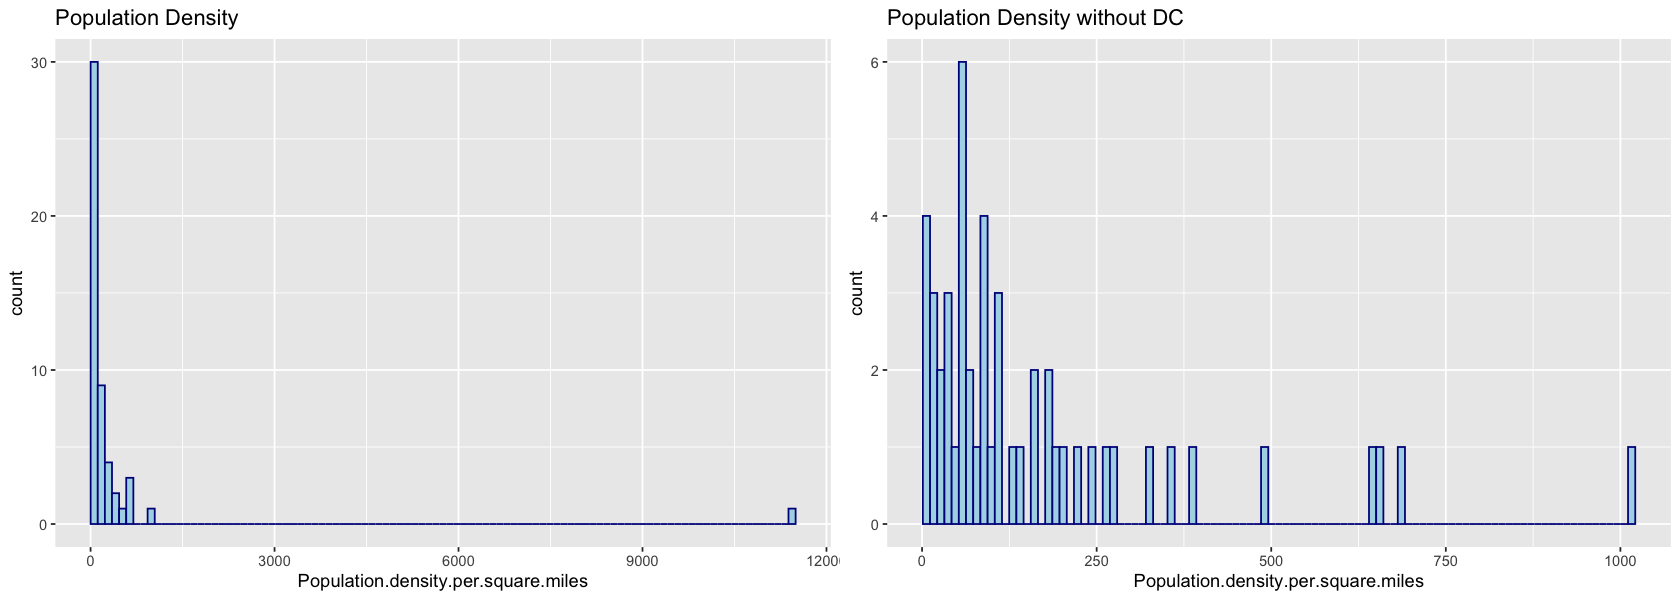

In [4]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

fig(14, 5)


hist_1 <- ggplot(data = df1) +
  geom_histogram(mapping = aes(x = Population.density.per.square.miles), binwidth = 0.15,  breaks = seq(min(df1$Population.density.per.square.miles), max(df1$Population.density.per.square.miles), length.out = 100), colour = "darkblue", fill="lightblue") +
  labs(title = 'Population Density')
 
df2 = subset(df1, (df1$Population.density.per.square.miles < 10000))

  hist_2 <- ggplot(data = df2) +
  geom_histogram(mapping = aes(x = Population.density.per.square.miles), binwidth = 0.15,  breaks = seq(min(df2$Population.density.per.square.miles), max(df2$Population.density.per.square.miles), length.out = 100), colour = "darkblue", fill="lightblue") +
  labs(title = 'Population Density without DC')
grid.arrange(hist_1, hist_2, ncol=2)





The histogram of population density shows one outlier with very high density - it is Washington D.C. The D.C is not a state and we could have included this data point if we were considering population density of U.S cities instead of states.  Hence we removed this outlier.  It was found to impact the measure of fit of regression method as well.

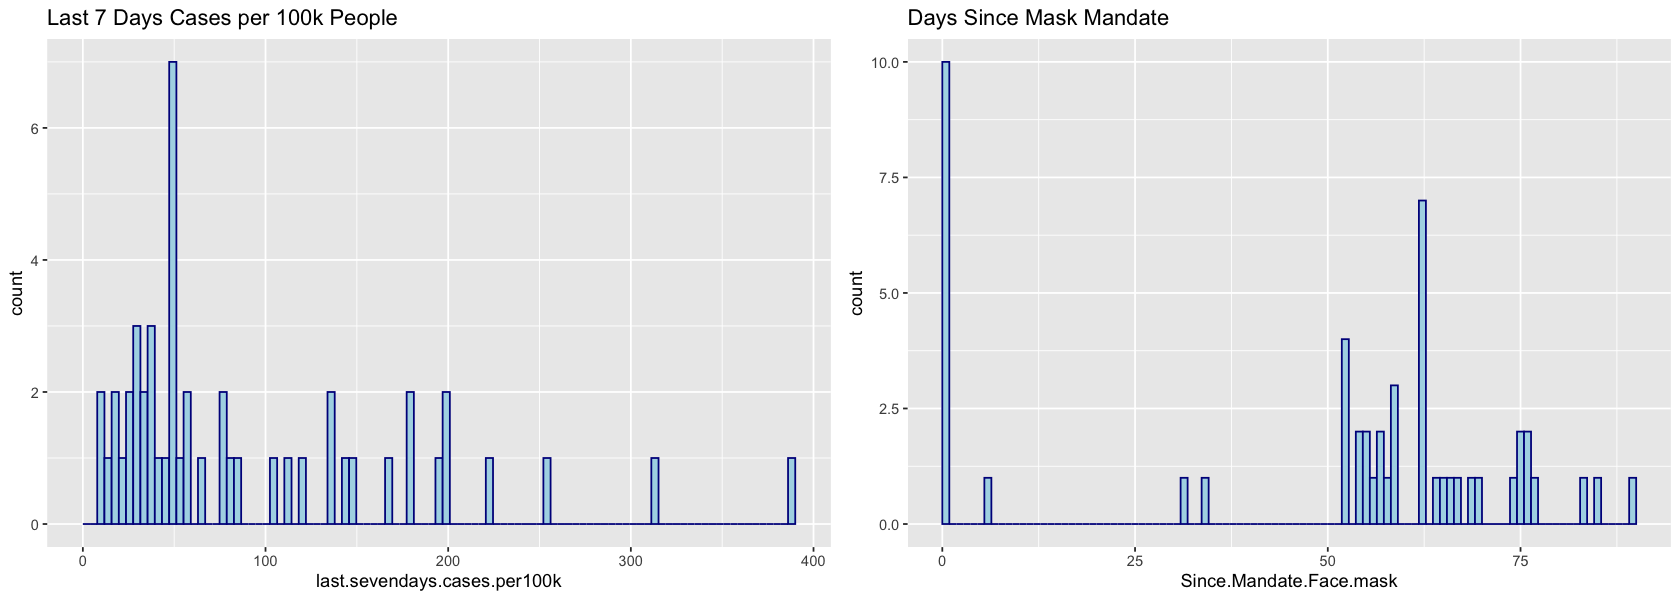

In [5]:

fig(14, 5)

hist_1 <- ggplot(data = df2) +
  geom_histogram(mapping = aes(x = last.sevendays.cases.per100k), binwidth = 1.0, breaks = seq(0, max(df2$last.sevendays.cases.per100k), length.out = 100), colour = "darkblue", fill="lightblue") +
  labs(title = 'Last 7 Days Cases per 100k People')
 
  hist_2 <- ggplot(data = df2) +
  geom_histogram(mapping = aes(x = Since.Mandate.Face.mask), binwidth = 0.15,  breaks = seq(min(df2$Since.Mandate.Face.mask), max(df2$Since.Mandate.Face.mask), length.out = 100), colour = "darkblue", fill="lightblue") +
  labs(title = 'Days Since Mask Mandate')
grid.arrange(hist_1, hist_2, ncol=2)


The histogram of Since.Mandate.Face.mask shows spike at value 0 - it implies there were 10 states that did not enforce face masks.

None of these variables have normal distribution. However samples size is 51 (>30) and sample distribution of parameters could be normal

In [6]:
names(df2)[17] <- "percent.below.poverty.level"
names(df2)[14] <- "max.unemp.benefit"
names(df2)[20] <- "child_0_18"
names(df2)[21] <- "adult_19_25"
names(df2)[22] <- "adult_26_34"

df2$age_group_0to34 = df2$child_0_18+ df2$adult_19_25+ df2$adult_26_34

## Base Model

The base model has covariates and response as follows. 

 
$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + u$

$X_1$ : age_group_0to34\
$X_2$ : Since.Mandate.Face.mask\
$Y$ : log(last.sevendays.cases.per100k)



In [45]:
base_model <- lm(log(last.sevendays.cases.per100k) ~ age_group_0to34 
                                                   + Since.Mandate.Face.mask,
                                                     data = df2)
first_r2 = summary(base_model)$adj.r.squared
print(paste("Adj R2 of base model:",first_r2))


[1] "Adj R2 of base model: 0.29419723139564"


We are going to analyze this base model briefly

In [ ]:
plot(base_model, which=1)
plot(base_model, which=3)
plot(base_model, which=2)


 - The Residual vs Fitted graph shows that Zero conditional mean assumption does not hold here as the plot has curve. 
 
 - The scale-location plot shows there is heteroskedasticity (residual Variance not constant)
 
 - The Q-Q plot show that residual does not have normal distribution

In [153]:
vif(base_model) > 4
coeftest(base_model, vcov = vcovHC)

age_group_0to34 Since.Mandate.Face.mask 
                  FALSE                   FALSE


t test of coefficients:

                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.3875497  1.5567131 -0.8913 0.377389    
age_group_0to34         13.4310444  3.3671818  3.9888 0.000236 ***
Since.Mandate.Face.mask -0.0093903  0.0034930 -2.6883 0.009967 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



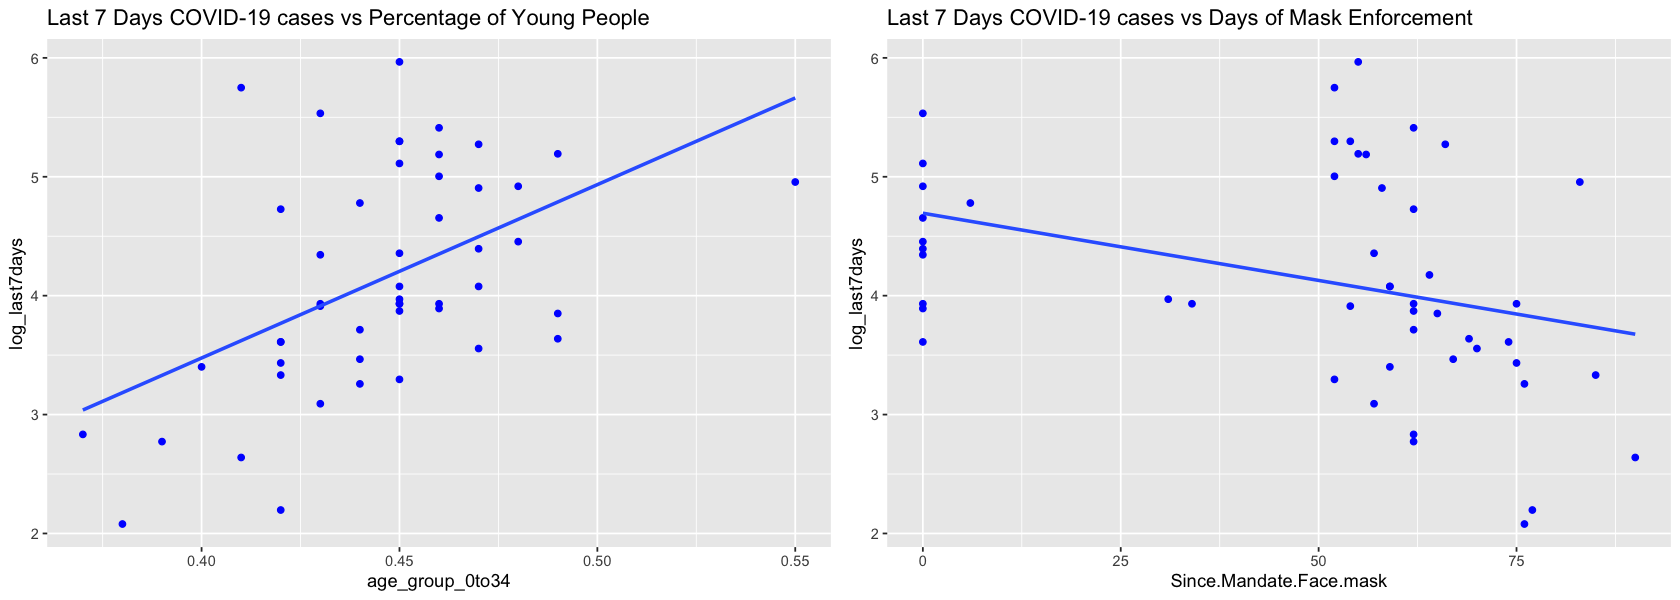

In [53]:
df2$log_last7days = log(df2$last.sevendays.cases.per100k)

pl1 = ggplot(data = df2, aes(x = age_group_0to34, y = log_last7days)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = 'Last 7 Days COVID-19 cases vs Percentage of Young People')

pl2 = ggplot(data = df2, aes(x = Since.Mandate.Face.mask, y = log_last7days)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = 'Last 7 Days COVID-19 cases vs Days of Mask Enforcement')

grid.arrange(pl1, pl2, ncol=2)

 - The variance inflation factor is much below 4 and indicates there is no heavy multicollinearity.

 - The $\beta_1$ and $\beta_2$ values of regressors are statistically significant due to low p-values. 

 - We can see the impact of  Since.Mandate.Face.mask on last.sevendays.cases.per100k. The number of COVID-19 infections is higher whem there was a delay in enforcing face mask. 
 
 - The percentage of people between 0 to 34 directly impacted spike in COVID-19 cases in last 7 days.


## Second/Final Model

The income inquality in US impacts public health. The families with lower income got affected dispropotionately as economy came to grinding halt during COVID-19 pandemic. The people with low income live in high population density and tend to use public transportation. These factors increase the risk of exposure to COVID-19. We will use two covariates that capture the income ineqiality - percent.below.poverty.level and max.unemp.benefit in each state in the final model. These parameters do not introduce too much multicollinearity and the final model strikes a balance between accuracy and parsimony.

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5+ u$

$X_1$ : age_group_0to34\
$X_2$ : Since.Mandate.Face.mask\
$X_3$ : max.unemp.benefit\
$X_4$ : log(Population.density.per.square.miles)\
$X_5$ : percent.below.poverty.level\
$Y$ : log(last.sevendays.cases.per100k)

In [44]:
final_model <- lm(log(last.sevendays.cases.per100k) ~ age_group_0to34 
                                                     + Since.Mandate.Face.mask 
                                                     + max.unemp.benefit
                                                     + log(Population.density.per.square.miles)
                                                     + percent.below.poverty.level, 
                                                       data=df2)
final_r2 =summary(final_model)$adj.r.squared
print(paste("Adj R2 of Second/Final model:",final_r2))

[1] "Adj R2 of third model: 0.56273198030137"


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



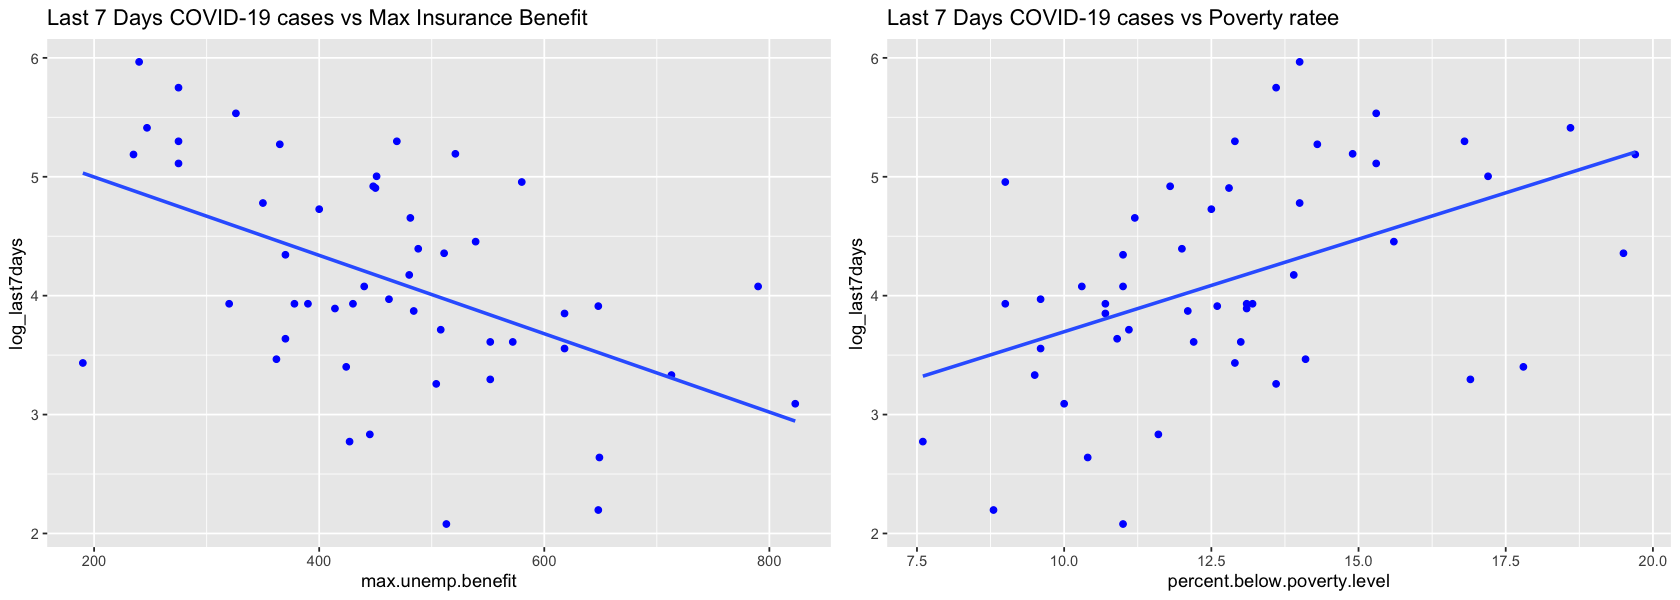

In [55]:

pl1 = ggplot(data = df2, aes(x = max.unemp.benefit, y = log_last7days)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = 'Last 7 Days COVID-19 cases vs Max Insurance Benefit')

pl2 = ggplot(data = df2, aes(x = percent.below.poverty.level, y = log_last7days)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = 'Last 7 Days COVID-19 cases vs Poverty rate')

grid.arrange(pl1, pl2, ncol=2)

 - The Residual vs Fitted graph (next section) shows that Zero conditional mean assumption does not hold but better than the base model. 
 
 - The scale-location plot ((next section) shows there is heteroskedasticity (residual variance not constant) but better than the base model
 
 - The Q-Q plot (next section) shows that residual does not have perfect normal distribution (especially higher values) but better than the base model.

## Third Model

In the third model, we will add some covariates related to state policy and see the impact on recent spike in the COVID-19 cases. The covariates are - number of days SIP (shelter in place) was mandated and number of days non-essential business were closed.  



$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5+ \beta_2X_6 + \beta_3X_7 + u$

$X_1$ : age_group_0to34\
$X_2$ : Since.Mandate.Face.mask\
$X_3$ : max.unemp.benefit\
$X_4$ : log(Population.density.per.square.miles)\
$X_5$ : percent.below.poverty.level\
$X_6$ : shelter.in.place\
$X_7$ : days.closed.nonessential\
$Y$ : log(last.sevendays.cases.per100k)




In [46]:
df2$days.in.sip <- df2$`End/relax.stay.at.home/shelter.in.place` - df2$`Stay.at.home/.shelter.in.place`
df2$days.closed.nonessential <- df2$`Began.to.reopen.businesses.statewide` - df2$`State.of.emergency`
third_model <- lm(log(last.sevendays.cases.per100k) ~ age_group_0to34 
                                                     + Since.Mandate.Face.mask 
                                                     + max.unemp.benefit
                                                     + log(Population.density.per.square.miles)
                                                     + percent.below.poverty.level
                                                     + days.in.sip
                                                     + days.closed.nonessential,
                                                       data=df2)
third_r2 = summary(third_model)$adj.r.squared
print(paste("Adj R2 of third model:",third_r2))

[1] "Adj R2 of third model: 0.554865863912989"


These parameters did not have any impact on the response variable (last.sevendays.cases.per100k) but introduced multicollinearity that resulted in lower measure of fit compared to final model. 

The p-value for $\beta6$ and $\beta7$ are high (fail to reject null hypothesis).  Also, the standard errors for other $\beta$ went up. The p-value of other $\beta$ went up and reduced the statistical significance as seen below.

In [47]:
coeftest(third_model, vcov = vcovHC)


t test of coefficients:

                                           Estimate Std. Error t value
(Intercept)                              -3.0053925  1.5119057 -1.9878
age_group_0to34                          16.0113844  2.6447625  6.0540
Since.Mandate.Face.mask                  -0.0065038  0.0030677 -2.1201
max.unemp.benefit                        -0.0021414  0.0010043 -2.1321
log(Population.density.per.square.miles)  0.1590013  0.0739013  2.1515
percent.below.poverty.level               0.0773685  0.0310461  2.4920
days.in.sip                               0.0016041  0.0033094  0.4847
days.closed.nonessential                 -0.0074504  0.0056944 -1.3084
                                          Pr(>|t|)    
(Intercept)                                0.05354 .  
age_group_0to34                          3.625e-07 ***
Since.Mandate.Face.mask                    0.04010 *  
max.unemp.benefit                          0.03903 *  
log(Population.density.per.square.miles)   0.03738 *  
perce

# An Assessment of the CLM Assumptions


## Linear Population Model:

Since we have not constrained the error term, there is no requirement for the variables to have normal distribution and no need to justify linear assumption model right now.  However, intuitively it makes sense as COVID-19 is known to spread from social contact of infected person. All the parameters that we chose influence social contact in a population and impact number of COVID-19 cases. 

## Random Sampling:

The data is collected by compiling/aggregating different online sources, state/county executive orders.  The data is collected systematically. The statewide data is not random - there will be correlation between adjacent states as they tend to have similar characteristics. Also, there will be clusteting depending on "Red" states or "Blue" states.  

![image](red_vs_blue.png)




## No Perfect Multicollinearity:

R will warn us if there is perfect collinearity and looking at the histogram there is no obvious perfect collinearity. 

The multicollinearity can assessed by computing a score called the variance inflation factor (VIF), which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

We can see that Variance Inflation Factor (VIF) is less than 4 for all the covariates it implies that there is no significant collinearity between them. And information that these  variables provide are meaningful (not redundant)


In [15]:
vif(final_model)
vif(final_model) > 4

log(Population.density.per.square.miles) 
                                1.215478 
                         age_group_0to34 
                                1.164294 
                 Since.Mandate.Face.mask 
                                1.153199 
                       max.unemp.benefit 
                                1.340497 
             percent.below.poverty.level 
                                1.298023

log(Population.density.per.square.miles) 
                                   FALSE 
                         age_group_0to34 
                                   FALSE 
                 Since.Mandate.Face.mask 
                                   FALSE 
                       max.unemp.benefit 
                                   FALSE 
             percent.below.poverty.level 
                                   FALSE


## Zero Conditional Mean:

 In this section we will explain the motivation to improve from base model to final model. The diagnostic plot of the base model shows  deviation from zero condition mean assumption for fitted value as shown before. This implies that our coefficients are biased.  The following steps are taken to improve exogeneity between X and u.

 - The number COVID-19 cases is a positive integer and cannot have zero mean.  We used log() transformation on the response variable and this transformation improved the measure of fit and the conditional mean of the residue is almost zero as shown below


 - We use background information knowledge to identify an variables which are omitted from the regression, hidden in $u$, which may be correlated with our x's which cause this functional dependence between $X$ and $u$
  
  We see that population density, percentage of people poverty line and maximum unemployment benefits influence social distancing and impact error term. So, the final model is constructed by adding these covariates. We can see the improvement in conditional mean values as they are closes to 0 line as seen below.



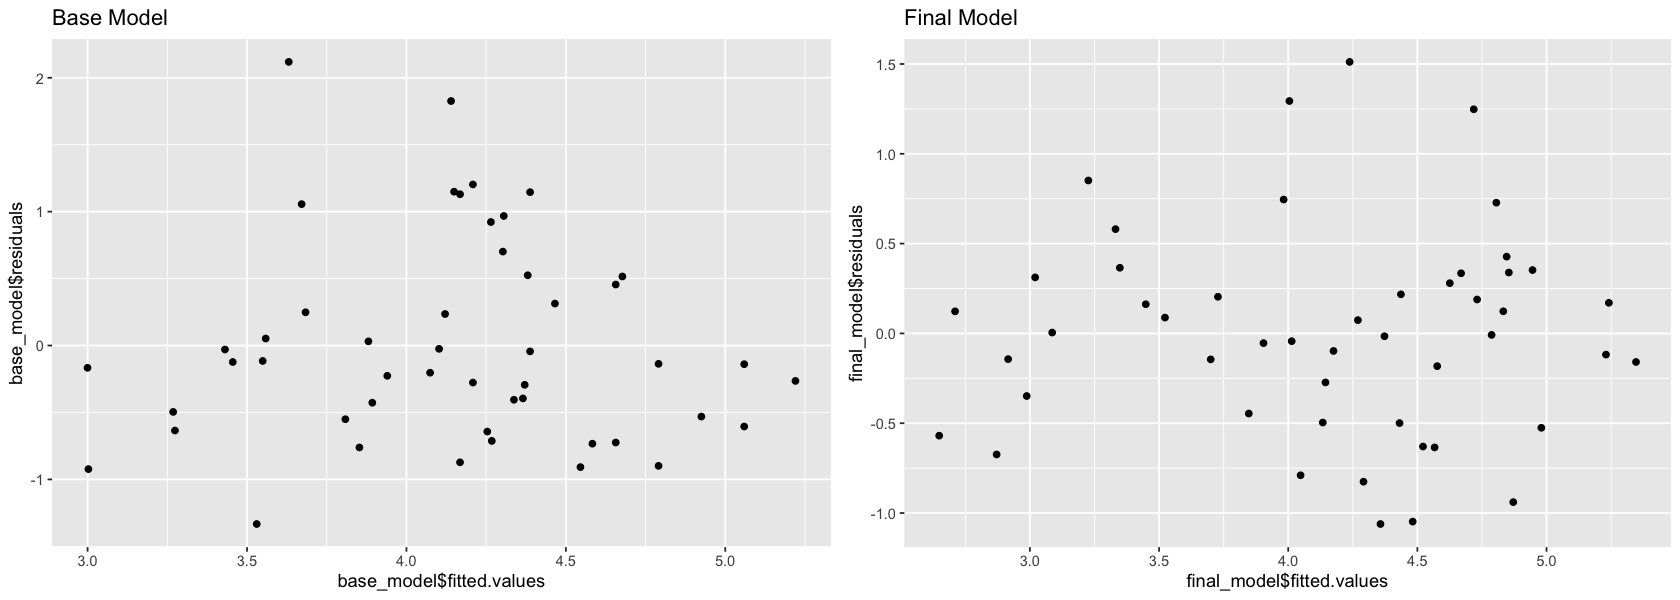

In [24]:
pl1 = qplot(base_model$fitted.values, base_model$residuals, main="Base Model")
pl2 = qplot(final_model$fitted.values, final_model$residuals,main="Final Model")
grid.arrange(pl1, pl2, ncol=2)

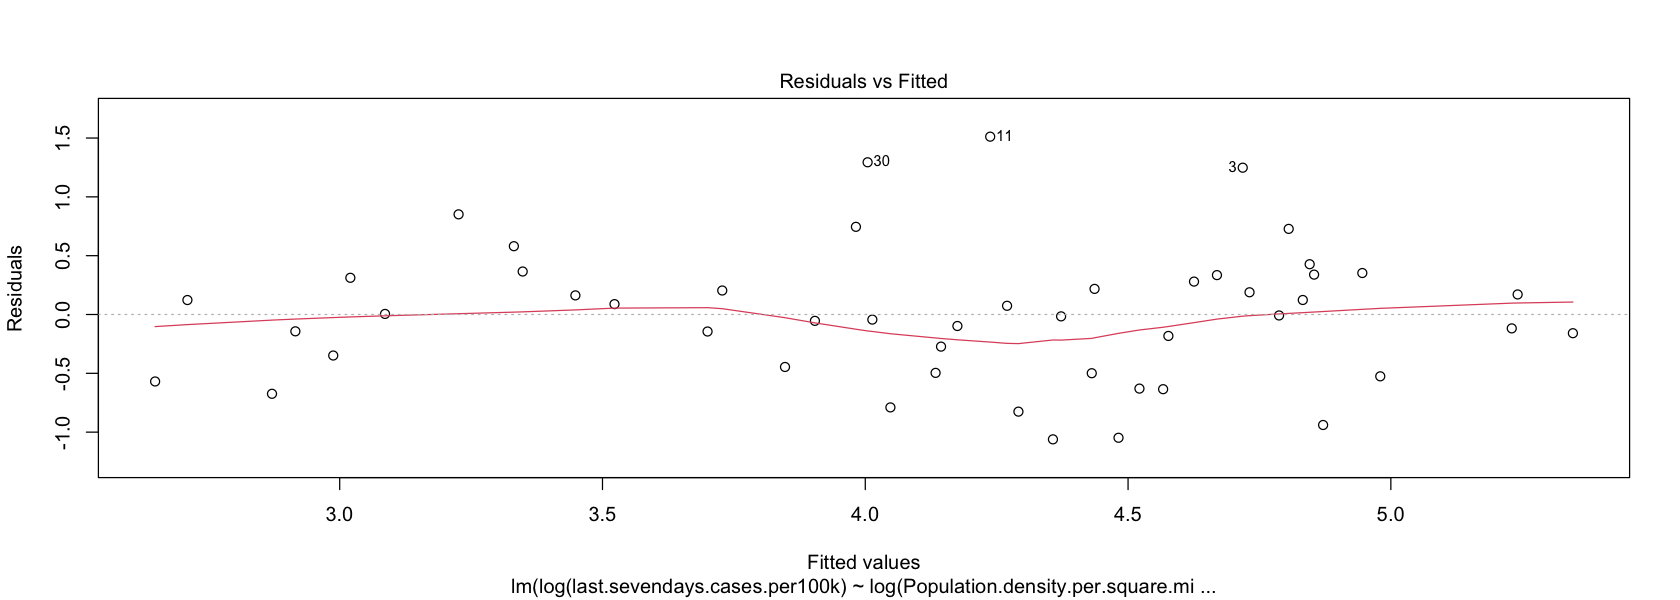

In [25]:
plot(final_model, which=1)

## Homoskedasticity:
  Our residuals versus fitted values show a dip/curve in the middle. So we used scale-location plot to check homoskedasticity. The red line of scale-location plot is not straight and doesn't indicate homoskedasticity (i.e variance of residual is not constant).
 

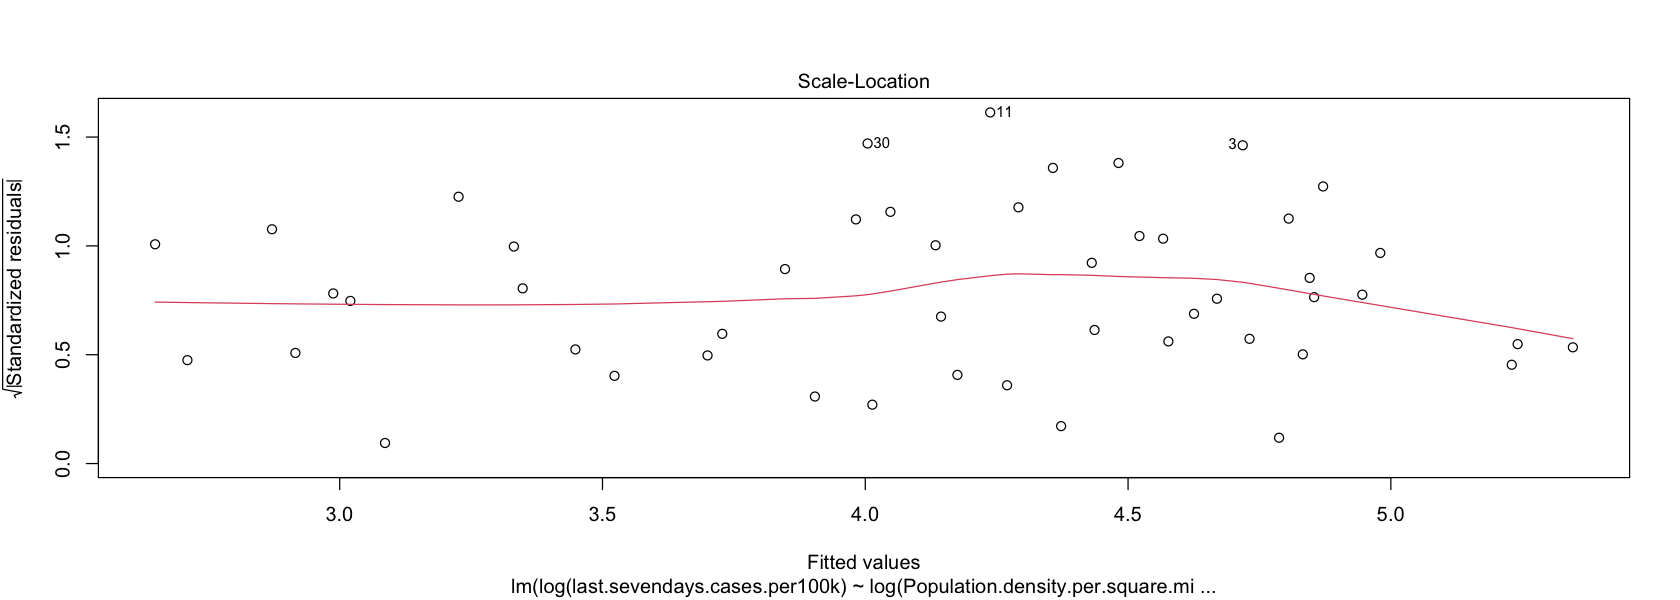

In [28]:
plot(final_model, which=3)

## Normality of Errors:
The Q-Q plot and histogram of residuals show that residuals from linear modeling do not have normal distribution.  This is expected because of small number of samples 50 and CLT is marginal.

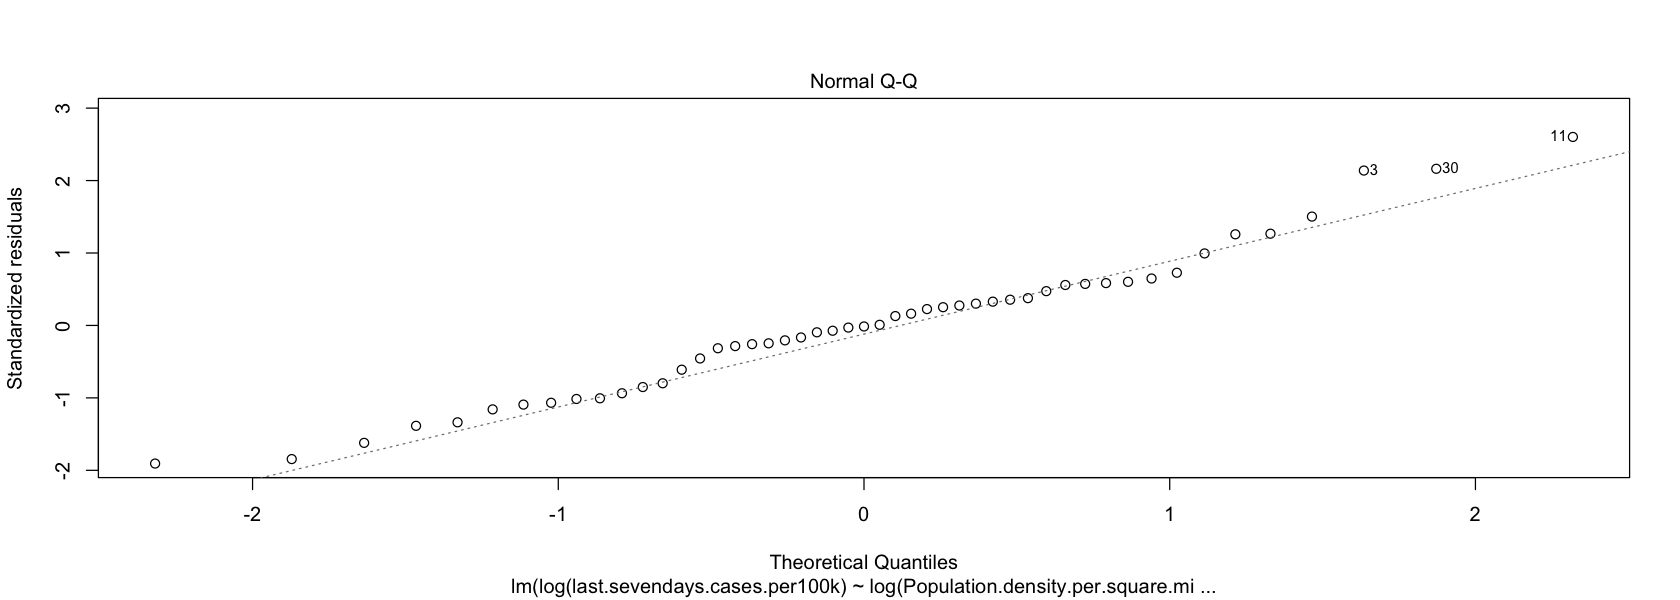

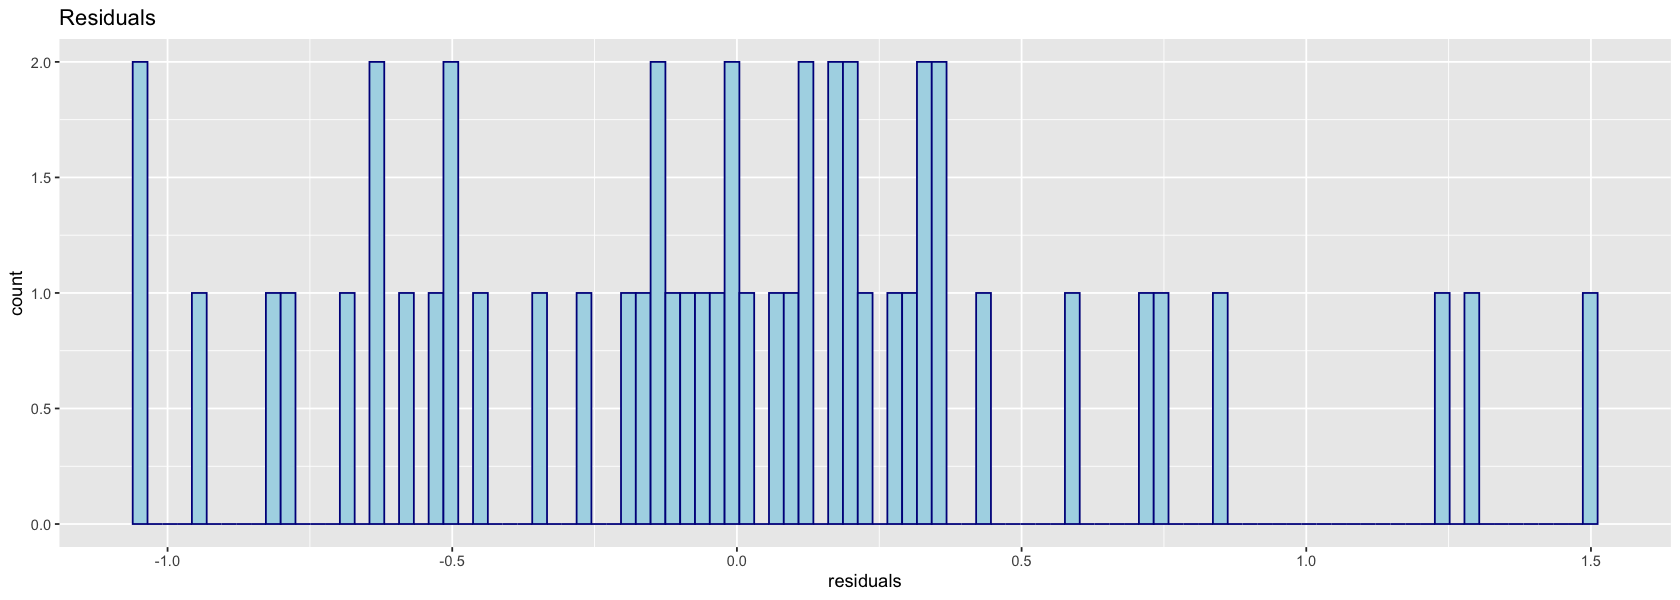

In [31]:
plot(final_model, which=2)
temp = data.frame("residuals"= final_model$residuals)
ggplot(data = temp) +
  geom_histogram(mapping = aes(x = residuals), binwidth = 0.15,  breaks = seq(min(temp$residuals), max(temp$residuals), length.out = 100), colour = "darkblue", fill="lightblue") +
  labs(title = 'Residuals Histogram')


# Regression Table

In your text, comment on both statistical significance and practical significance.  You may want to include statistical tests besides the standard t-tests for regression coefficients.

In [38]:
coeftest(final_model, vcov = vcovHC)


t test of coefficients:

                                            Estimate  Std. Error t value
(Intercept)                              -3.07113135  1.27391017 -2.4108
age_group_0to34                          15.42514646  2.08087470  7.4128
Since.Mandate.Face.mask                  -0.00639538  0.00303487 -2.1073
max.unemp.benefit                        -0.00224096  0.00096972 -2.3109
log(Population.density.per.square.miles)  0.13966343  0.06993291  1.9971
percent.below.poverty.level               0.08279430  0.02944836  2.8115
                                          Pr(>|t|)    
(Intercept)                               0.020265 *  
age_group_0to34                          3.265e-09 ***
Since.Mandate.Face.mask                   0.040961 *  
max.unemp.benefit                         0.025697 *  
log(Population.density.per.square.miles)  0.052167 .  
percent.below.poverty.level               0.007398 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 - All the $\beta$ values are statistically significant with low p-values, except for population density that is marginal.

 - We can see the impact of  max unemployment benefit - lower benefits result in higher COVID-19 cases. 
 
 - Also, higher percentage of poverty results in more COVID-19 cases.
 
We think the coefficients $\beta_1$, $\beta_2$ have practical significance as we can urge people to highlight importance of using face masks and social distancing among youth to prevent further spread of COVID-19

In [32]:
(se.base_model = sqrt(diag(vcovHC(base_model))))
(se.final_model = sqrt(diag(vcovHC(final_model))))
stargazer::stargazer(base_model,final_model, title="Results",align=TRUE, se = list(se.base_model, se.final_model), type="text")

(Intercept)         age_group_0to34 Since.Mandate.Face.mask 
            1.556713136             3.367181799             0.003493039

(Intercept) 
                            1.2739101749 
log(Population.density.per.square.miles) 
                            0.0699329137 
                         age_group_0to34 
                            2.0808746973 
                 Since.Mandate.Face.mask 
                            0.0030348671 
                       max.unemp.benefit 
                            0.0009697194 
             percent.below.poverty.level 
                            0.0294483606


Results
                                                      Dependent variable:             
                                         ---------------------------------------------
                                               log(last.sevendays.cases.per100k)      
                                                  (1)                    (2)          
--------------------------------------------------------------------------------------
log(Population.density.per.square.miles)                               0.140**        
                                                                       (0.070)        
                                                                                      
age_group_0to34                                13.431***              15.425***       
                                                (3.367)                (2.081)        
                                                                                      
Since.Mandate.Face.mask           

In [12]:
(se.base_model = sqrt(diag(vcovHC(base_model))))
(se.final_model = sqrt(diag(vcovHC(final_model))))
stargazer::stargazer(base_model,final_model, title="Results",align=TRUE, se = list(se.base_model, se.final_model), type="text")

(Intercept)         age_group_0to34 Since.Mandate.Face.mask 
            1.556713136             3.367181799             0.003493039

(Intercept) 
                            1.2739101749 
log(Population.density.per.square.miles) 
                            0.0699329137 
                         age_group_0to34 
                            2.0808746973 
                 Since.Mandate.Face.mask 
                            0.0030348671 
                       max.unemp.benefit 
                            0.0009697194 
             percent.below.poverty.level 
                            0.0294483606


Results
                                                      Dependent variable:             
                                         ---------------------------------------------
                                               log(last.sevendays.cases.per100k)      
                                                  (1)                    (2)          
--------------------------------------------------------------------------------------
log(Population.density.per.square.miles)                               0.140**        
                                                                       (0.070)        
                                                                                      
age_group_0to34                                13.431***              15.425***       
                                                (3.367)                (2.081)        
                                                                                      
Since.Mandate.Face.mask           

# A Discussion of Omitted Variables

## State Capacity

 - State capacity to trace, test, and isolate a COVID-19 patient is one of the key success factors in dealing with the outbreak. Ability to understand situation, and inform, communicate, and educate the general public to bring behavioral change is also very important. 
 - Such organizational capacity could have influenced state officials’ response in terms of timing and duration of Shelter-in-Place Order. State’s fiscal capacity could have been reflected in the weekly unemployment insurance maximum data. 
 - States capacity would have negative coefficient when the dependent variable is cases in last 7 days. It is likely that poverty level of the citizens and capacity of the state have negative correlation between the two. This would lead to positive bias for the coefficient of poverty in our model, away from zero
 
## Social Trust

 - Trust in facts, authorities, science, and other people with masks could be important omitted variable in the COVID-19 pandemic. Weaker social trust would lead to less compliance to guidance and orders such as wearing facial masks.
 - Generally, lower social trust would result in higher case numbers, less compliance in policy response, and denial to wear masks. Sometimes, lack of trust from the authorities in their own ability to control the virus or in people’swillingness to comply guidance would trigger stronger measures such as restrictions on movements. 
 - That said, social trust would be positively correlated with the coefficient of policy response in our model. As COVID-19 cases have negative relationship with policy response, social trust is likely to have negative bias toward zero for the coefficient of any policy response, including mandating face mask in public-facing businesses.
 
## Leadership and Political Inclination of the citizens

- Many times, the top leadership made contradictory statements about COVID-19. As he still holds large support from the constituents of the conservative party, his words have affected policy response of many governors as well as behavior of core supporters. As he often doubted the use of mask for controlling the outbreak, some governors didn’t announce executive order to wear masks and many people avoided wearing masks. This could have created a large variability in the total confirmed cases by states.

## Household Structure and Housing

 - When someone carries the COVID-19 virus, it is very likely to infect one’s family members living closely together. A multi-generational family structure might be susceptible to contagion and might result in higher casualties. Poor housing condition may contribute higher contagion risk in this family structure. 
 - A poor housing condition might incentivize people to go out and face higher chance of getting infected. People with no homes would not be able to implement stay-at-home order at all. 
 - Household structure and housing might not directly appear in the state level population density numbers or overall poverty level. -“% of people living in Multi-generational structure” by state could be used to test this variable. 
 - It is possible that multi-generational household structure leads to higher population density. If that is true, we can conclude that the coefficient of the variable population density in our model would be biased away from zero. 
 
 
## Industry composition and interaction

- Ability to perform their normal operation without physical presence could be one important factor in the timing and duration of the shelter-in-place order. Some states are host to Financial sector or IT sector, and they can stay longer with the shelter-in-place order without hurting the local economy. States with their people working in manufacturing, farming, and tourism industry might have lower incentive to practice lock-down.
- There is a private data provider, which aggregates work-at-home adoption rate by industry. Currently, the data is outdated as it has data only for 2019. 
- Work-at-home adoption rate could be higher in white-collar jobs such as IT and finance. Many of these jobs are concentrated in metropolitan area with high population density. In this case, work-at-home adoption rate would have negative bias toward zero for the coefficient of population density in our model. 

## Inter-state and international traffic

 - The pandemic is originated from China. During the onset of the pandemic, with not much warnings from the WHO and public health officials, cities with high international traffic could have invited more virus carriers into their communities and allowed more widespread contagion. 
 - Geographical proximity and inter-state people to people relationship could be influencing current stage of the pandemic. In that sense, sampling statistics are not completely random.
 - The number of users for the airport and train station could be used for the proxy and it would pose positive bias away from zero for the coefficient of population density in our model. Here we assumed large inter-state and international airports are located near highly populated cities, thus having positive correlation between the two variable.


# Conclusion

The final/second model answered the key research question - if ignoring the Mask Mandate and casual attitude of younger population resulted in rise of COVID-19 cases in some states in the US.

 Key takeaways:
 
 - The final/second model adequately describes the response variable (last.sevendays.cases.per100k) with measure of fit value = 0.56
 
 - The coefficents of linear regression models have statistical significance and intuitively have practical significance 
 
 - Some of the CLM Assumptions are not met because of small sample size but that is typical of many practical data. It is a best effort using linear regression method.

 - The model shows the importance of face mask and social distancing among active younger generation to stop the spread of COVID-19. 